# Desafio - Machine Learning

Com base no módulo de aprendizagem de máquina, deve-se criar um modelo para prever valores de vendas de produtos de uma empresa, com base em um conjunto de dados fornecido.

dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

Os objetivos são:
    1. Carregar o dataset
    2. Tratar os dados
    3. Pré-processar os dados (formatar, quando necessário)
    4. Treinar um modelo de machine learning
    5. Fazer previsões (prever a venda de dezembro, e.g.)
    6. Avaliar o modelo
    7. Salvar o modelo
    8. Montar um histograma dos dados
    9. Montar um plot de scatter

In [1]:
# Importando pacotes do sistema
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [4]:
# Criar um dataframe a partir do dicionário
df_vendas = pd.DataFrame(dados_vendas)

# Exibir o dataframe
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


## Detecção de anomalias

In [5]:
# Verificando informações do dataframe

df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


- Observa-se que o dataframe não possui valores ausentes, pois, o método .info() indica que há 12 entradas de 0 a 11 e que nas colunas 'mes' e 'vendas' não há valores ausentes/nulos.

In [6]:
# Verificando estatísticas descritivas
df_vendas.describe()


,vendas
count,12.000000
mean,2716.666667
std,410.838020
min,2000.000000
25%,2450.000000
50%,2750.000000
75%,3025.000000
max,3300.000000


<Axes: >

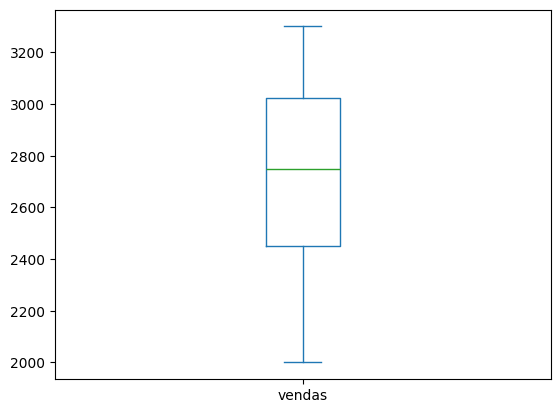

In [25]:
# Gerar um boxplot para detectar outliers
df_vendas.plot.box(column='vendas')

In [7]:
# Detectando valores ausentes
df_vendas_missing = df_vendas.isna().sum()

# Visualizando os resultados
print(f"Valores ausentes no dataframe de vendas:\n{df_vendas_missing}\n")

Valores ausentes no dataframe de vendas:
mes       0
vendas    0
dtype: int64



In [8]:
# Detectando valores ausentes
df_vendas_null = df_vendas.isnull().sum()

# Visualizando os resultados
print(f"Valores nulos no dataframe de vendas:\n{df_vendas_null}\n")

Valores nulos no dataframe de vendas:
mes       0
vendas    0
dtype: int64



- Conforme observado anteriormente, não há valores ausentes nem nulos no dataframe de vendas.
- Por não existirem valores ausentes nem nulos, não há necessidade de preenchimento dos dados.
- É necessário apenas formatar os valores de meses para o formato numérico, para que o modelo possa realizar as previsões.

## Formatando os valores de meses para o formato numérico

In [9]:
# Convertendo os valores de meses para o formato numérico
df_vendas['mes_numerico'] = range(1, 13)

# Exibindo o dataframe
df_vendas

,mes,vendas,mes_numerico
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [10]:
# Criar coluna com contração dos meses
df_vendas['mes_contracao'] = list(map(lambda x: x[:3], df_vendas['mes'].str.lower()))

# Exibindo o dataframe
df_vendas


,mes,vendas,mes_numerico,mes_contracao
0,Janeiro,2000,1,jan
1,Fevereiro,2200,2,fev
2,Março,2300,3,mar
3,Abril,2500,4,abr
4,Maio,2600,5,mai
5,Junho,2700,6,jun
6,Julho,2800,7,jul
7,Agosto,2900,8,ago
8,Setembro,3000,9,set
9,Outubro,3100,10,out


## Criando visualizações para entender melhor os dados

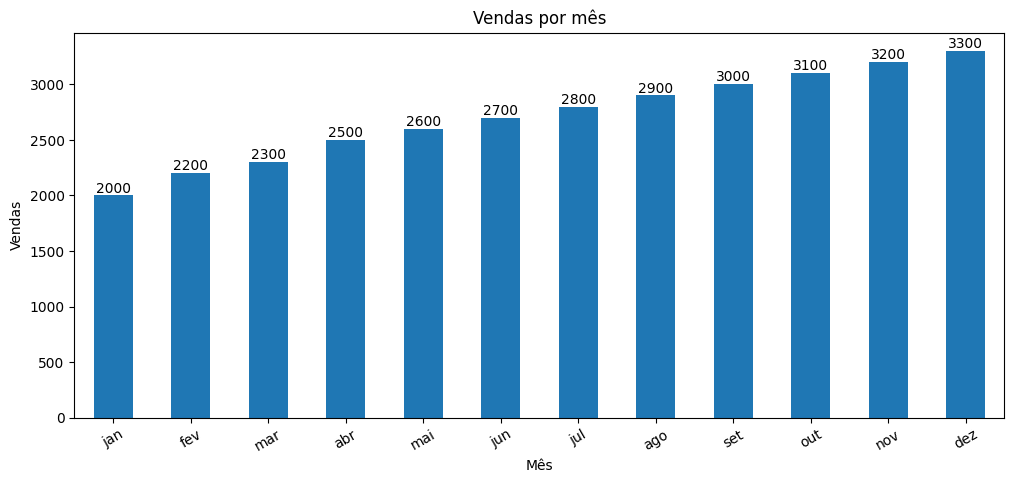

In [11]:
ax = df_vendas.plot.bar(x='mes', y='vendas', legend=False, figsize=(12, 5))
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_xticklabels(df_vendas['mes_contracao'], rotation=30)
ax.set_title('Vendas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Vendas')
plt.show()


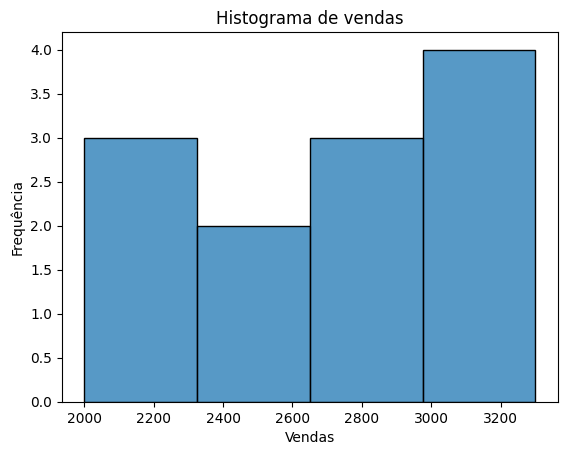

In [12]:
# Criando um histograma
ax = sns.histplot(df_vendas['vendas'], bins=4, edgecolor='black')
ax.set_title('Histograma de vendas')
ax.set_xlabel('Vendas')
ax.set_ylabel('Frequência')
plt.show()


/tmp/ipykernel_24165/2997203692.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_vendas['mes'], rotation=45)


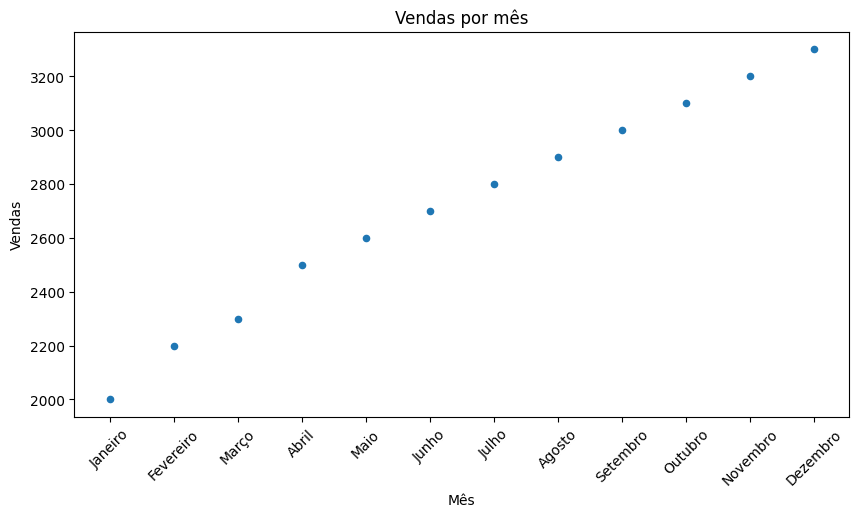

In [13]:
# Criando um plot de scatter
ax = df_vendas.plot.scatter(x='mes', y='vendas', figsize=(10, 5))
ax.set_xticklabels(df_vendas['mes'], rotation=45)
ax.set_title('Vendas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Vendas')
plt.show()


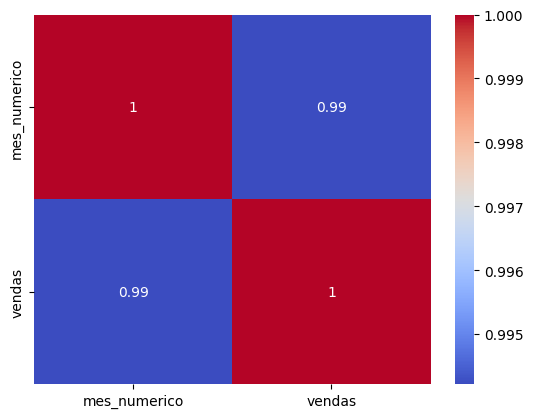

In [24]:
# Apresentar um mapa de calor com correlação entre as variáveis
sns.heatmap(df_vendas[['mes_numerico', 'vendas']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
# Criando um modelo de regressão linear
X = pd.DataFrame(df_vendas[['mes_numerico']])
y = df_vendas['vendas']

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [15]:
# Observando os conjuntos de treinamento e teste
print(f"Conjunto de treinamento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de teste: {X_test.shape}, {y_test.shape}")

Conjunto de treinamento: (10, 1), (10,)
Conjunto de teste: (2, 1), (2,)


In [16]:
# Criando um pipeline para pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Fazendo previsões
y_pred = pipeline.predict(X_test)


In [17]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

MSE: 1136.91
R2: 0.55


/tmp/ipykernel_24165/941668587.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_vendas['mes_contracao'], rotation=45)


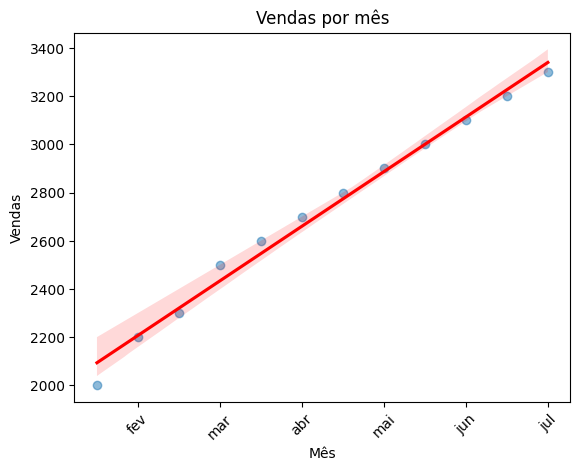

In [18]:
# Criando plot de dispersão em comparação com o modelo de regressão linear
ax = sns.regplot(x='mes_numerico', y='vendas', data=df_vendas, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
ax.set_xticklabels(df_vendas['mes_contracao'], rotation=45)
ax.set_title('Vendas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Vendas')
plt.show()

In [ ]:
# Previsão para o mês de dezembro
mes_dezembro = pd.DataFrame({'mes_numerico': [12]})
previsao_dezembro = pipeline.predict(mes_dezembro)
print(f"Previsão para o mês de dezembro: {previsao_dezembro[0]:.2f}")
print(f"Erro absoluto: {abs(previsao_dezembro[0] - y_test.values[0]):.2f}")
print(f"Erro relativo: {abs(previsao_dezembro[0] - y_test.values[0]) / y_test.values[0]:.2%}")

Previsão para o mês de dezembro: 3355.62
Erro absoluto: 155.62
Erro relativo: 4.86%
MSE: 1136.91
R2: 0.55


### Relatório Final de Previsão de Vendas

A partir do modelo de regressão linear, foi possível prever as vendas para o mês de dezembro com um erro absoluto de 155,62 reais e um erro relativo de 4,86%.

Além disso, o gráfico de dispersão em comparação com o modelo de regressão linear mostra que o modelo conseguiu prever as vendas com um erro relativo de 4,86%, o que é um resultado bastante satisfatório. A faixa sombreada representa a variância dos dados para cada faixa de previsão.


## Discussão sobre o modelo de regressão linear

In [20]:
# Criar um modelo de regressão linear
prediction_model = LinearRegression()
prediction_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


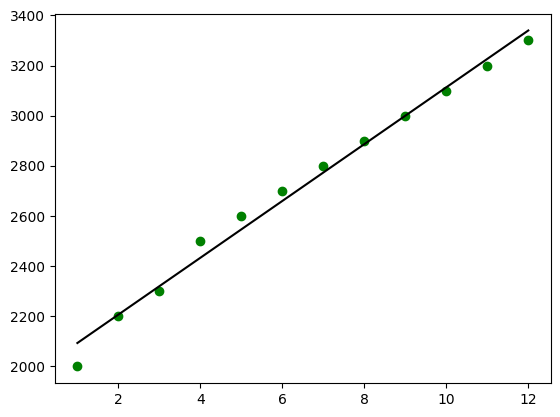

In [21]:
# Mostrar como a reta foi calculada
plt.scatter(X, y, color="g")
plt.plot(X, prediction_model.coef_ * X + prediction_model.intercept_, color="k")